# POPENE basic usage example

POPANE dataset usage in Python with pandas module. This is a bare-minimum example of loading the data, data inspection and the simples visualization.

### Imports

In [1]:
import glob
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## Reading the content of the datafiles

List available files

In [2]:
paths = glob.glob('study1_sample/*.csv', recursive=True)
paths

['study1_sample/1_Baseline.csv',
 'study1_sample/1_Positive_Emotion_High_Approach.csv',
 'study1_sample/2_All.csv',
 'study1_sample/1_All.csv',
 'study1_sample/3_Baseline.csv',
 'study1_sample/3_All.csv',
 'study1_sample/1_Threat.csv',
 'study1_sample/2_Threat.csv',
 'study1_sample/3_Threat.csv',
 'study1_sample/2_Baseline.csv',
 'study1_sample/3_Positive_Emotion_High_Approach.csv',
 'study1_sample/2_Neutral8.csv']

Restric to files containing all conditions for participants no. 1, 2 & 3.

In [3]:
paths = [i for i in paths if 'All' in i]
paths

['study1_sample/2_All.csv',
 'study1_sample/1_All.csv',
 'study1_sample/3_All.csv']

Get one of the files.

In [4]:
example_file = paths[0]

Preview the data with bash command.

In [5]:
!head -n 15 $example_file

#Study_name,Study 1
#Subject_ID,2
#Subject_Age,21
#Subject_Sex,1
#Channel_Name,timestamp,meter,ECG,EDA,temp,respiration,SBP,DBP,marker
#Data_Category,timestamp,data,data,data,data,data,data,data,marker
#Data_Unit,millisecond,custom,millivolts,microsiemens,Celcius,millivolts,mmHg,mmHg,string
#Data_Sample_rate,1000Hz,1000Hz,1000Hz,1000Hz,1000Hz,1000Hz,1000Hz,1000Hz,1000Hz
#Data_Device,LabChart 8.19 (ADInsturments, New Zeland),Response Meter (ADInsturments, New Zeland),ECG (ADInsturments, New Zeland),GSR Amp (ADInstruments, New Zealand),Thermistor Pod (ADInstruments, New Zealand),Pneumotrace II (UFI, USA),Finometer MIDI (Finapres Medical Systems, Netherlands),Finometer MIDI  (Finapres Medical Systems, Netherlands),Labchart 8.19 (AdInsturments, New Zeland)
timestamp,meter,ECG,EDA,temp,respiration,SBP,DBP,marker
0,5.0,3.012,0.0,33.38,0.68,121.97,108.03,
0.001,5.0,2.576,0.03,33.38,0.69,122.16,108.31,
0.002,5.0,1.762,0.17,33.38,0.7,121.0,107.84,
0.003,5.0,0.894,0.55,33.38,0.71,120.72,107.28,


In [6]:
print(example_file)

study1_sample/2_All.csv


Read file contents into pandas' DataFrame. Skip 9 first rows, these are the header.

In [7]:
df = pd.read_csv(example_file, skiprows=9)
df

,timestamp,meter,ECG,EDA,temp,respiration,SBP,DBP,marker
0,0.000,5.0,3.012,0.00,33.38,0.68,121.97,108.03,NaN
1,0.001,5.0,2.576,0.03,33.38,0.69,122.16,108.31,NaN
2,0.002,5.0,1.762,0.17,33.38,0.70,121.00,107.84,NaN
3,0.003,5.0,0.894,0.55,33.38,0.71,120.72,107.28,NaN
4,0.004,5.0,-0.049,1.26,33.38,0.73,121.53,107.69,NaN
...,...,...,...,...,...,...,...,...,...
941745,941.745,1.3,0.000,NaN,33.68,0.50,99.72,99.97,NaN
941746,941.746,1.3,0.021,NaN,33.68,0.50,100.19,100.31,NaN
941747,941.747,1.3,-0.008,NaN,33.68,0.50,99.09,99.72,NaN
941748,941.748,1.3,-0.032,NaN,33.68,0.50,99.22,100.06,NaN


## Descriptive statistics

Example descriptive statistics of the data frame.

In [8]:
df.describe()

,timestamp,meter,ECG,EDA,temp,respiration,SBP,DBP,marker
count,941750.000000,941750.000000,941750.000000,912754.000000,941750.000000,941750.000000,941750.000000,941750.000000,510003.000000
mean,470.874500,4.939183,0.049516,16.294775,33.948250,0.961860,103.702046,109.067772,49.823856
std,271.859952,2.691836,0.291976,1.476093,0.472775,1.380919,18.680043,18.788685,64.841542
min,0.000000,0.000000,-3.084000,0.000000,33.190000,-5.870000,-12.280000,-1.630000,-1.000000
25%,235.437250,1.300000,-0.051000,15.360000,33.550000,-0.010000,90.190000,94.880000,-1.000000
50%,470.874500,5.000000,0.010000,16.040000,33.890000,1.150000,102.030000,108.970000,-1.000000
75%,706.311750,7.500000,0.078000,17.270000,34.410000,1.880000,115.130000,122.000000,108.000000
max,941.749000,9.900000,4.044000,20.480000,34.770000,7.310000,201.030000,201.130000,209.000000


## Plotting the dataframe

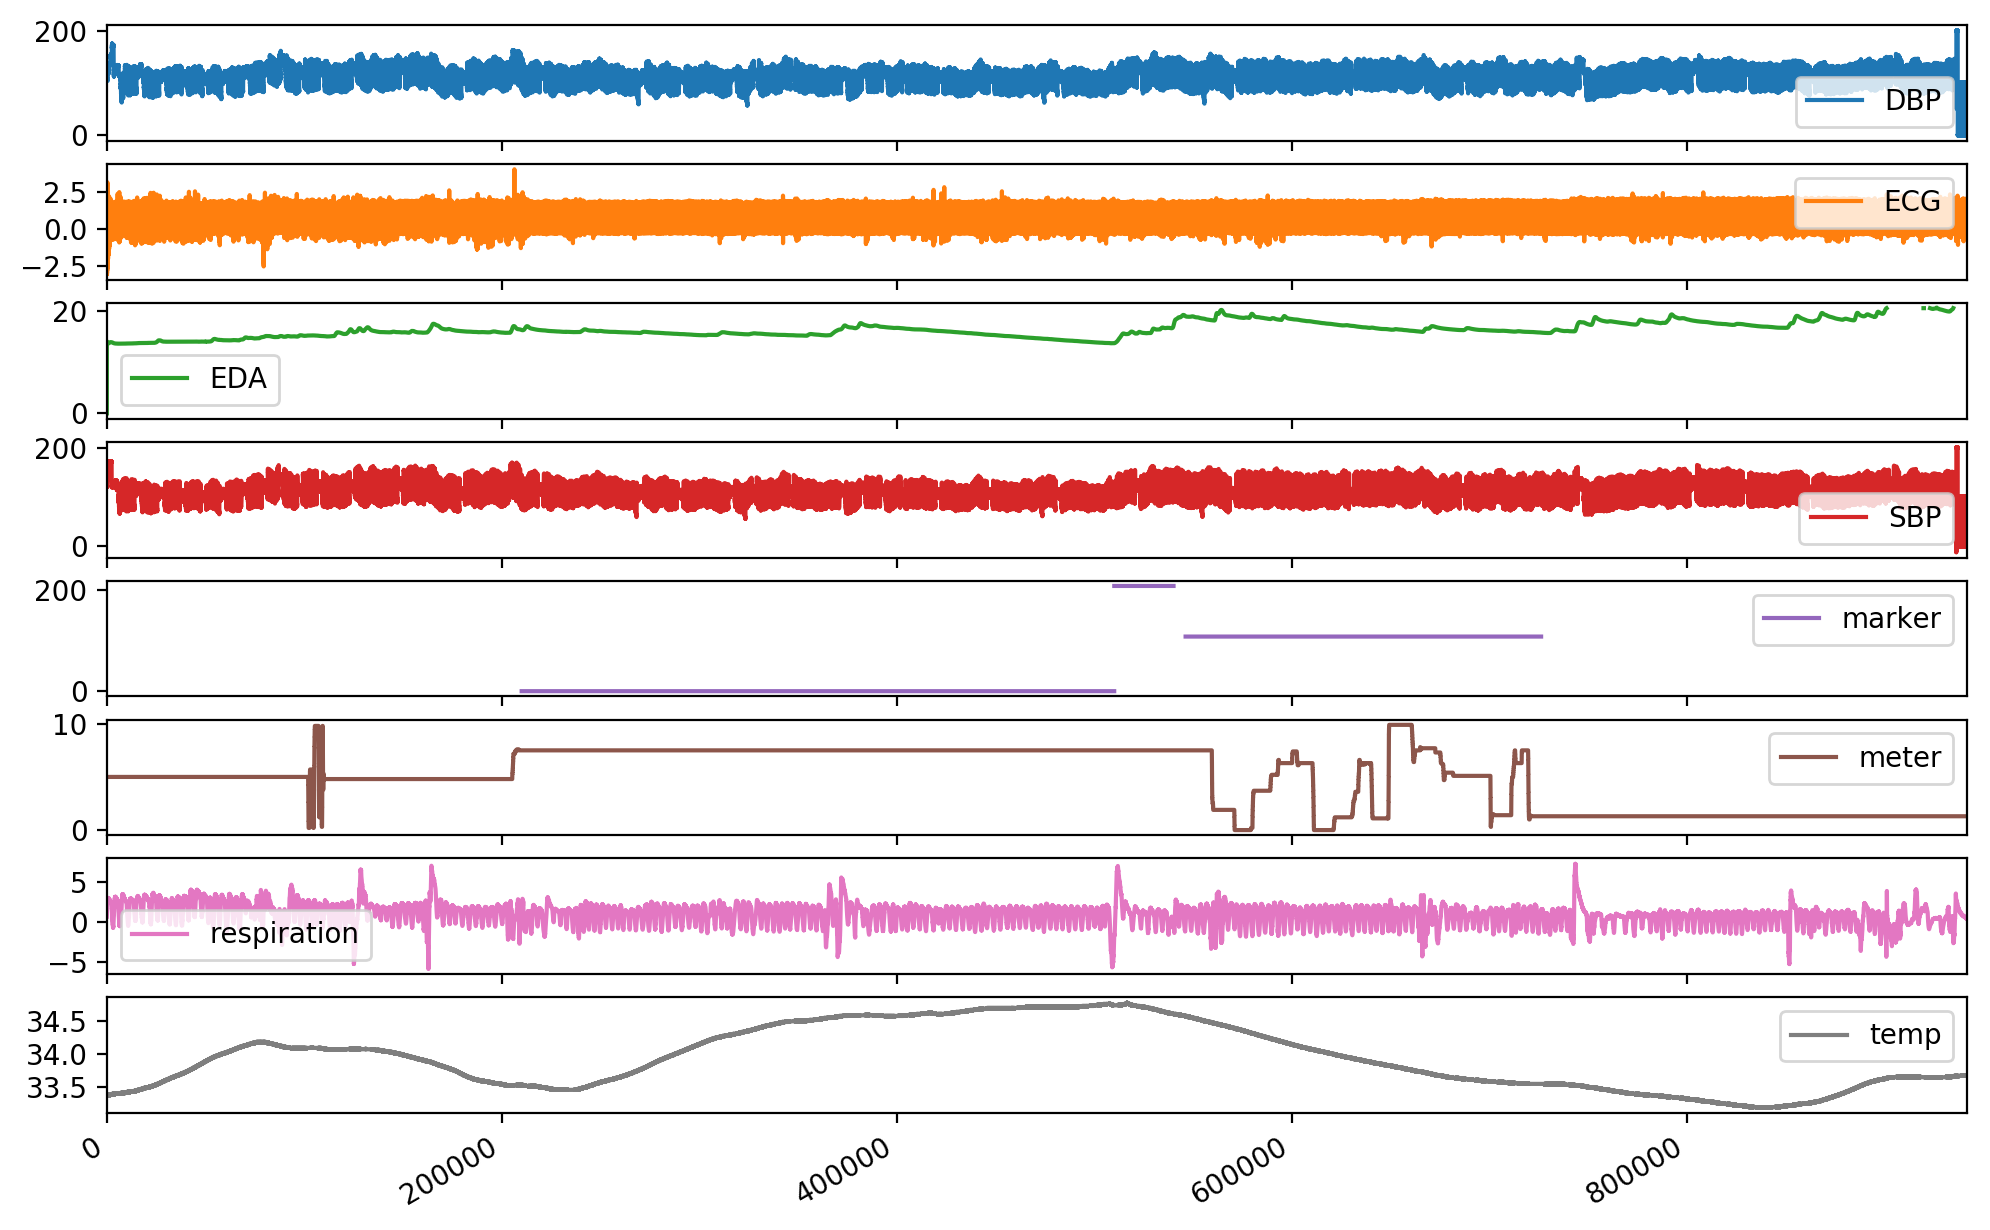

In [9]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

df[df.columns.difference(['timestamp'])].plot(subplots=True)
plt.show()